Loading the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_NWIN_CLND_BLNCD_2.csv")

In [3]:
# df_0.head()

In [4]:
df_0_selected_regions = pd.read_csv('data/data file 4/data_1.csv')
df_baseline_corrected = pd.read_csv('data/data file 4/data_1_bslcrct.csv')
df_smoothed = pd.read_csv('data/data file 4/data_1_smoothed.csv')
df_normalized = pd.read_csv('data/data file 4/data_1_normalized.csv')
df_1st_derivative = pd.read_csv('data/data file 4/data_1_1_der.csv')
df_2nd_derivative = pd.read_csv('data/data file 4/data_1_2_der.csv')
df_1_der_savgol = pd.read_csv('data/data file 4/data_1_1_der_savgol.csv')
df_2_der_savgol = pd.read_csv('data/data file 4/data_1_2_der_savgol.csv')
df_snv = pd.read_csv('data/data file 4/data_1_snv.csv')
df_rnv = pd.read_csv('data/data file 4/data_1_rnv.csv')

Step-by-Step Implementation for RandomForest Classifier with Hyperparameter Tuning

Load the Smoothed Dataset

In [5]:
# Load the smoothed dataset
df_smoothed_v0w = pd.read_csv('data/data file 4/data_1_1_der.csv')

Define the Target Variable and Features

In [6]:
# Define the target_v0w variable and feature columns
target_v0w = 'thnoth_name'
features_v0w = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

In [33]:
print(features_v0w)

Index(['1088.137', '1088.62', '1089.102', '1089.584', '1090.066', '1090.548',
       '1091.03', '1091.512', '1091.994', '1092.477',
       ...
       '727.514', '727.996', '728.478', '728.961', '729.443', '729.925',
       '730.407', '730.889', '731.371', '731.853'],
      dtype='object', length=1576)


RandomForest Classification and Evaluation with LOGO-CV

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV RandomForest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.7728855684282803
Leave-One-Group-Out CV RandomForest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.70      0.67      0.68       922
        Thai       0.68      0.71      0.69       922

    accuracy                           0.69      1844
   macro avg       0.69      0.69      0.69      1844
weighted avg       0.69      0.69      0.69      1844

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       620   302
Thai           271   651
Class: Non-Thai
precision: 0.6958473625140292
recall: 0.6724511930585684
f1-score: 0.6839492553778268
support: 922.0

Class: Thai
precision: 0.683105981112277
recall: 0.7060737527114967
f1-score: 0.6944
support: 922.0

accuracy: 0.6892624728850325

Class: macro avg
precision: 0.6894766718131531
recall: 0.6892624728850325
f1-score: 0.6891746276889135
support: 1844.0

Class: weighted avg
precision: 0.6894766718131532
recall: 0.6892624728850325
f1-

Implementing Different Classifiers on the Smoothed Dataset

In [8]:
import pandas as pd

# Define the target variable and feature columns
target_v0w = 'thnoth_name'
features_v0w = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Define the Evaluation Function

In [9]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def classify_and_evaluate_logo_cv(model, X, y, groups, class_labels):
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()

    # Initialize lists to store results
    accuracies = []
    y_true_all = []
    y_pred_all = []

    # Perform LOGO-CV
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = model.predict(X_test)

        # Calculate and store test accuracies
        accuracies.append(accuracy_score(y_test, y_test_pred))

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate average accuracies
    avg_accuracy = np.mean(accuracies)

    print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

    # Generate the classification report for the overall test predictions
    report_logo = classification_report(y_true_all, y_pred_all, target_names=class_labels, output_dict=True)
    print(f"Leave-One-Group-Out CV {model.__class__.__name__} Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=class_labels))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report_logo.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()


Implement and Evaluate Each Classifier

Support Vector Machine (SVM)

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0w = 'thnoth_name'
features_v0w = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier with different kernel
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

# Calculate the overall accuracy from the classification report
overall_accuracy_report = report_svm_logo['accuracy']
print(f'Overall Accuracy from Classification Report: {overall_accuracy_report}')

# Compare the accuracies
if np.isclose(avg_accuracy, overall_accuracy_report):
    print("The average test accuracy and overall accuracy from the classification report match.")
else:
    print("There is a discrepancy between the average test accuracy and overall accuracy from the classification report.")


Leave-One-Group-Out CV - Average Test Accuracy: 0.9907007440448328
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       1.00      0.96      0.98       922
        Thai       0.96      1.00      0.98       922

    accuracy                           0.98      1844
   macro avg       0.98      0.98      0.98      1844
weighted avg       0.98      0.98      0.98      1844

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       883    39
Thai             3   919
Class: Non-Thai
precision: 0.9966139954853274
recall: 0.9577006507592191
f1-score: 0.9767699115044248
support: 922.0

Class: Thai
precision: 0.9592901878914405
recall: 0.9967462039045553
f1-score: 0.9776595744680852
support: 922.0

accuracy: 0.9772234273318872

Class: macro avg
precision: 0.9779520916883839
recall: 0.9772234273318872
f1-score: 0.977214742986255
support: 1844.0

Class: weighted avg
precision: 0.9779520916883839
recall: 0.9772234273318872


In [11]:
# Define the target variable and feature columns
target_v0w = 'thnoth_name'
features_v0w = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm2_all = []
y_pred_svm2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm2_all.extend(y_test)
    y_pred_svm2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm2_all, y_pred_svm2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm1_logo = classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm2_all, y_pred_svm2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm1_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.9772234273318872
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       1.00      0.96      0.98       922
        Thai       0.96      1.00      0.98       922

    accuracy                           0.98      1844
   macro avg       0.98      0.98      0.98      1844
weighted avg       0.98      0.98      0.98      1844

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       883    39
Thai             3   919
Class: Non-Thai
precision: 0.9966139954853274
recall: 0.9577006507592191
f1-score: 0.9767699115044248
support: 922.0

Class: Thai
precision: 0.9592901878914405
recall: 0.9967462039045553
f1-score: 0.9776595744680852
support: 922.0

accuracy: 0.9772234273318872

Class: macro avg
precision: 0.9779520916883839
recall: 0.9772234273318872
f1-score: 0.977214742986255
support: 1844.0

Class: weighted avg
precision: 0.9779520916883839
recall: 0.9772234273318872


Random Forest (RF) classifier

In [12]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_rf2_all = []
y_pred_rf2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Store the prediction and actual value
    y_true_rf2_all.extend(y_test)
    y_pred_rf2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_rf2_all, y_pred_rf2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Random Forest Model Classification Report")
print(classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_rf2_all, y_pred_rf2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.6892624728850325
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.70      0.67      0.68       922
        Thai       0.68      0.71      0.69       922

    accuracy                           0.69      1844
   macro avg       0.69      0.69      0.69      1844
weighted avg       0.69      0.69      0.69      1844

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       620   302
Thai           271   651
Class: Non-Thai
precision: 0.6958473625140292
recall: 0.6724511930585684
f1-score: 0.6839492553778268
support: 922.0

Class: Thai
precision: 0.683105981112277
recall: 0.7060737527114967
f1-score: 0.6944
support: 922.0

accuracy: 0.6892624728850325

Class: macro avg
precision: 0.6894766718131531
recall: 0.6892624728850325
f1-score: 0.6891746276889135
support: 1844.0

Class: weighted avg
precision: 0.6894766718131532
recall: 0.6892624728850325
f1

Extra Trees (ET) classifier

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the smoothed dataset
df_smoothed_v0w = pd.read_csv('data/data file 4/data_1_1_der.csv')

# Define the target variable and feature columns
target_v0u = 'thnoth_name'
features_v0u = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0u]
y = df_smoothed_v0w[target_v0u]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_et_all = []
y_pred_et_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    et.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = et.predict(X_test)
    
    # Store the prediction and actual value
    y_true_et_all.extend(y_test)
    y_pred_et_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_et_all, y_pred_et_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Extra Trees Model Classification Report")
print(classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_et_all, y_pred_et_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.6936008676789588
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.71      0.65      0.68       922
        Thai       0.68      0.74      0.71       922

    accuracy                           0.69      1844
   macro avg       0.70      0.69      0.69      1844
weighted avg       0.70      0.69      0.69      1844

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       599   323
Thai           242   680
Class: Non-Thai
precision: 0.7122473246135553
recall: 0.6496746203904555
f1-score: 0.6795235394214407
support: 922.0

Class: Thai
precision: 0.6779661016949152
recall: 0.737527114967462
f1-score: 0.7064935064935065
support: 922.0

accuracy: 0.6936008676789588

Class: macro avg
precision: 0.6951067131542352
recall: 0.6936008676789588
f1-score: 0.6930085229574736
support: 1844.0

Class: weighted avg
precision: 0.6951067131542352
recall: 0.693600867

k-Nearest Neighbors (kNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'thnoth_name'
features_v0u = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0u]
y = df_smoothed_v0w[target_v0u]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.8351409978308026
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       1.00      0.67      0.80       922
        Thai       0.75      1.00      0.86       922

    accuracy                           0.84      1844
   macro avg       0.87      0.84      0.83      1844
weighted avg       0.87      0.84      0.83      1844

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       620   302
Thai             2   920
Class: Non-Thai
precision: 0.9967845659163987
recall: 0.6724511930585684
f1-score: 0.8031088082901554
support: 922.0

Class: Thai
precision: 0.7528641571194763
recall: 0.9978308026030369
f1-score: 0.8582089552238806
support: 922.0

accuracy: 0.8351409978308026

Class: macro avg
precision: 0.8748243615179375
recall: 0.8351409978308026
f1-score: 0.830658881757018
support: 1844.0

Class: weighted avg
precision: 0.8748243615179375
recall: 0.8351409978308026


Gradient Boosting Classifier (GBC)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_gbc = []
y_true_all_gbc = []
y_pred_all_gbc = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_gbc.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_gbc.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_gbc.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_gbc.extend(y_test)
    y_pred_all_gbc.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_gbc = accuracy_score(y_true_all_gbc, y_pred_all_gbc)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_gbc}')
print("Leave-One-Group-Out CV GBC Model Classification Report")
report_gbc_logo = classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_gbc = confusion_matrix(y_true_all_gbc, y_pred_all_gbc)
df_cm_gbc = pd.DataFrame(cm_logo_gbc, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_gbc)

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.6588937093275488
Leave-One-Group-Out CV GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.68      0.59      0.63       922
        Thai       0.64      0.73      0.68       922

    accuracy                           0.66      1844
   macro avg       0.66      0.66      0.66      1844
weighted avg       0.66      0.66      0.66      1844

Confusion Matrix:
          Non-Thai  Thai
Non-Thai       543   379
Thai           250   672
Class: Non-Thai
precision: 0.6847414880201765
recall: 0.588937093275488
f1-score: 0.6332361516034986
support: 922.0

Class: Thai
precision: 0.6393910561370124
recall: 0.7288503253796096
f1-score: 0.6811961479979727
support: 922.0

accuracy: 0.6588937093275488

Class: macro avg
precision: 0.6620662720785945
recall: 0.6588937093275489
f1-score: 0.6572161498007356
support: 1844.0

Class: weighted avg
precision: 0.6620662720785944
recall: 0.6588937093275488


LightGBM (LGBM) classifier 

In [16]:
import lightgbm as lgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lgbm = []
y_true_all_lgbm = []
y_pred_all_lgbm = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lgbm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lgbm.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lgbm.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lgbm.extend(y_test)
    y_pred_all_lgbm.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lgbm = accuracy_score(y_true_all_lgbm, y_pred_all_lgbm)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lgbm}')
print("Leave-One-Group-Out CV LGBM Model Classification Report")
report_lgbm_logo = classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lgbm = confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm)
df_cm_lgbm = pd.DataFrame(cm_logo_lgbm, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lgbm)

# Display the detailed results
for class_name, metrics in report_lgbm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Number of positive: 922, number of negative: 807
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400942
[LightGBM] [Info] Number of data points in the train set: 1729, number of used features: 1576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533256 -> initscore=0.133222
[LightGBM] [Info] Start training from score 0.133222
[LightGBM] [Info] Number of positive: 904, number of negative: 922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400942
[LightGBM] [Info] Number of data points in the train set: 1826, number of used features: 1576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495071 -> initscore=-0.019716
[LightGBM] [Info] Start training from score -0.019716
[LightGBM] [Info

Linear Discriminant Analysis (LDA) classifier

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_lda = []
y_pred_all_lda = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lda.extend(y_test)
    y_pred_all_lda.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lda = accuracy_score(y_true_all_lda, y_pred_all_lda)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lda}')
print("Leave-One-Group-Out CV LDA Model Classification Report")
report_lda_logo = classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lda = confusion_matrix(y_true_all_lda, y_pred_all_lda)
df_cm_lda = pd.DataFrame(cm_logo_lda, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lda)

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.07049891540130152
Leave-One-Group-Out CV LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.09      0.09      0.09       922
        Thai       0.05      0.05      0.05       922

    accuracy                           0.07      1844
   macro avg       0.07      0.07      0.07      1844
weighted avg       0.07      0.07      0.07      1844

Confusion Matrix:
          Non-Thai  Thai
Non-Thai        83   839
Thai           875    47
Class: Non-Thai
precision: 0.08663883089770355
recall: 0.09002169197396963
f1-score: 0.08829787234042553
support: 922.0

Class: Thai
precision: 0.05304740406320542
recall: 0.0509761388286334
f1-score: 0.051991150442477874
support: 922.0

accuracy: 0.07049891540130152

Class: macro avg
precision: 0.06984311748045449
recall: 0.07049891540130152
f1-score: 0.0701445113914517
support: 1844.0

Class: weighted avg
precision: 0.06984311748045449
recall: 0.07049

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_ldar = []
y_pred_all_ldar = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_ldar.extend(y_test)
    y_pred_all_ldar.extend(y_test_pred)

# Reverse the predicted classes
y_pred_all_ldar_reversed = [1 - y for y in y_pred_all_ldar]

# Calculate the overall accuracy for the reversed predictions
overall_accuracy_lda_reversed = accuracy_score(y_true_all_ldar, y_pred_all_ldar_reversed)

print(f'Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): {overall_accuracy_lda_reversed}')
print("Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)")
report_lda_logo_reversed = classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_))

# Generate and display the confusion matrix for the reversed predictions
cm_logo_lda_reversed = confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed)
df_cm_lda_reversed = pd.DataFrame(cm_logo_lda_reversed, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Reversed Classes):")
print(df_cm_lda_reversed)

# Display the detailed results for the reversed predictions
for class_name, metrics in report_lda_logo_reversed.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): 0.9295010845986985
Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)
              precision    recall  f1-score   support

    Non-Thai       0.95      0.91      0.93       922
        Thai       0.91      0.95      0.93       922

    accuracy                           0.93      1844
   macro avg       0.93      0.93      0.93      1844
weighted avg       0.93      0.93      0.93      1844

Confusion Matrix (Reversed Classes):
          Non-Thai  Thai
Non-Thai       839    83
Thai            47   875
Class: Non-Thai
precision: 0.9469525959367946
recall: 0.9099783080260304
f1-score: 0.9280973451327433
support: 922.0

Class: Thai
precision: 0.9133611691022965
recall: 0.9490238611713666
f1-score: 0.9308510638297872
support: 922.0

accuracy: 0.9295010845986985

Class: macro avg
precision: 0.9301568825195455
recall: 0.9295010845986985
f1-score: 0.9294742044812653
support: 1844.0

Class: weighted avg

Logistic Regression classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression model with a different solver
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
test_accuracies_logreg = []
y_true_all_logreg = []
y_pred_all_logreg = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Calculate and store test accuracies
    test_accuracies_logreg.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all_logreg.extend(y_test)
    y_pred_all_logreg.extend(y_test_pred)

# Flip the predictions
y_pred_lg_flipped = ['Non-Thai' if pred == 'Thai' else 'Thai' for pred in y_pred_all_logreg]

# Generate the classification report for the flipped predictions
report_logreg_flipped = classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report")
print(classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_))

# Generate and display the confusion matrix for the flipped predictions
cm_logreg_flipped = confusion_matrix(y_true_all_logreg, y_pred_lg_flipped)
df_cm_logreg_flipped = pd.DataFrame(cm_logreg_flipped, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_logreg_flipped)

# Display the detailed results for the flipped predictions
for class_name, metrics in report_logreg_flipped.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.91      0.93       922
        Thai       0.91      0.96      0.94       922

    accuracy                           0.93      1844
   macro avg       0.93      0.93      0.93      1844
weighted avg       0.93      0.93      0.93      1844

Confusion Matrix (Flipped):
          Non-Thai  Thai
Non-Thai       838    84
Thai            38   884
Class: Non-Thai
precision: 0.95662100456621
recall: 0.9088937093275488
f1-score: 0.932146829810901
support: 922.0

Class: Thai
precision: 0.9132231404958677
recall: 0.9587852494577006
f1-score: 0.9354497354497354
support: 922.0

accuracy: 0.9338394793926247

Class: macro avg
precision: 0.9349220725310389
recall: 0.9338394793926247
f1-score: 0.9337982826303182
support: 1844.0

Class: weighted avg
precision: 0.9349220725310388
recall: 0.9338394793926247
f1-score: 0.9337982826303182
supp

ConfusionMatrixDisplay

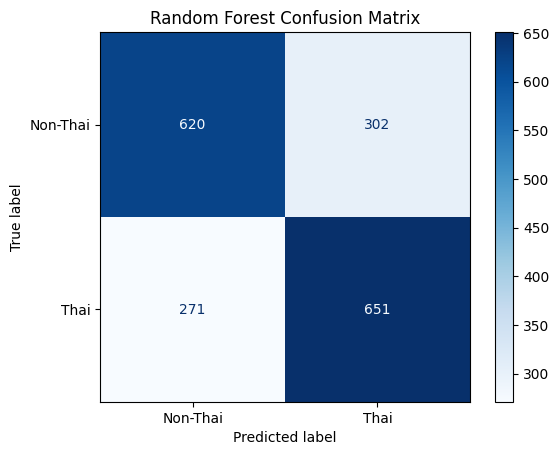

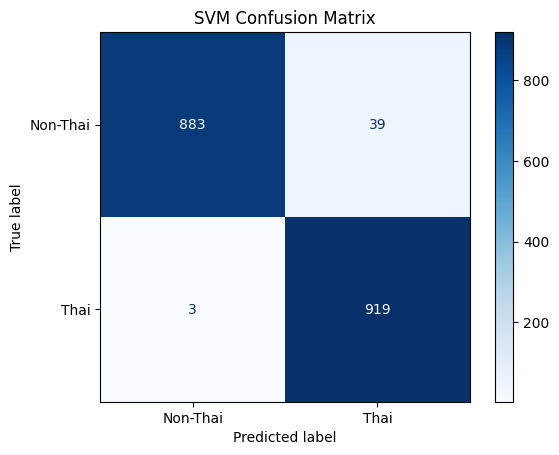

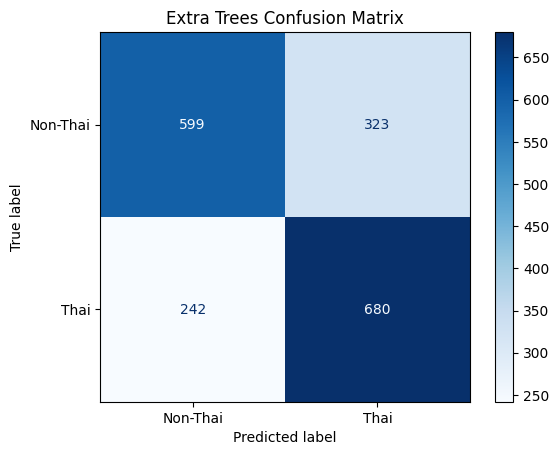

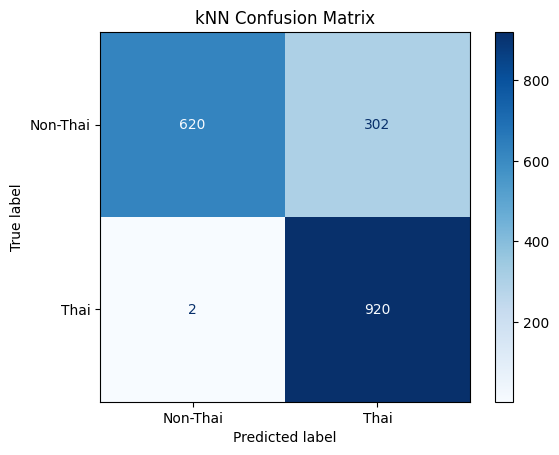

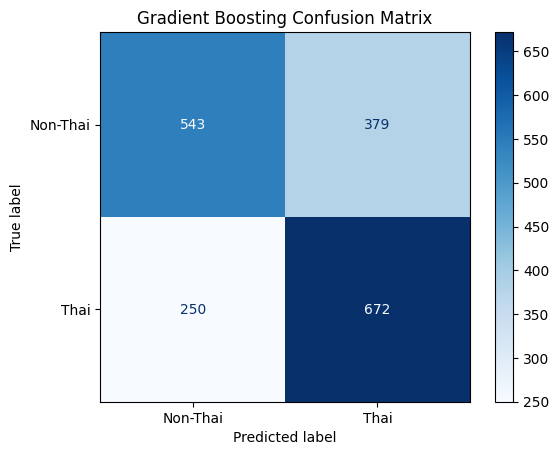

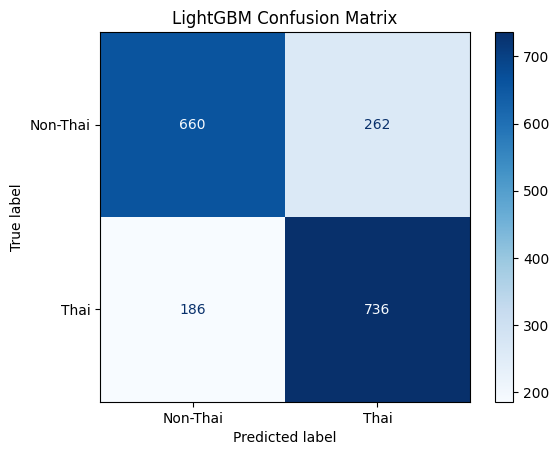

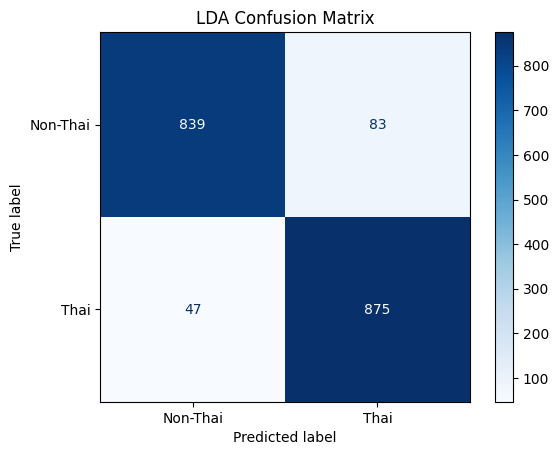

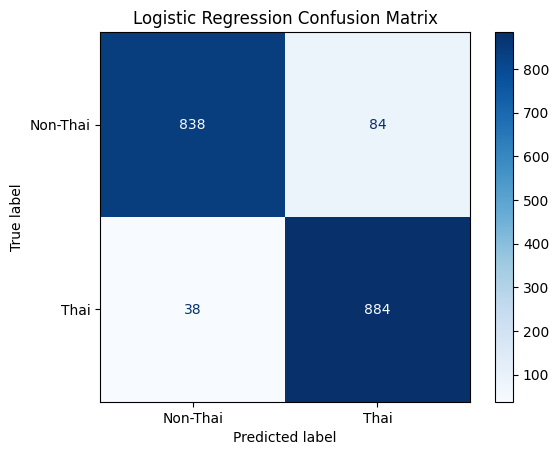

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the true labels and predictions for each classifier stored in the following variables:
# y_true_rf, y_pred_rf
# y_true_svm, y_pred_svm
# y_true_et, y_pred_et
# y_true_knn, y_pred_knn
# y_true_gbc, y_pred_gbc
# y_true_lgbm, y_pred_lgbm
# y_true_lda, y_pred_lda
# y_true_logreg, y_pred_logreg

# y_true_rf2_all, y_pred_rf2_all
# y_true_svm2_all,  y_pred_svm2_all
# y_true_et_all, y_pred_et_all
# y_true_knn_all, y_pred_knn_all
# y_true_all_gbc, y_pred_all_gbc
# y_true_all_lgbm, y_pred_all_lgbm
# y_true_all_ldar, y_pred_all_ldar_reversed
# y_true_all_logreg, y_pred_lg_flipped

# Define the class labels
class_labels = le.classes_

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Display confusion matrices for each classifier
display_confusion_matrix(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Displaying Confusion Matrices as Text Tables

In [21]:
# Function to display confusion matrix as a text table
def display_confusion_matrix_text(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(title)
    print(df_cm)
    print()

# Display confusion matrices for each classifier as text tables
display_confusion_matrix_text(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix_text(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix_text(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix_text(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix_text(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix_text(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix_text(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix_text(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Random Forest Confusion Matrix
          Non-Thai  Thai
Non-Thai       620   302
Thai           271   651

SVM Confusion Matrix
          Non-Thai  Thai
Non-Thai       883    39
Thai             3   919

Extra Trees Confusion Matrix
          Non-Thai  Thai
Non-Thai       599   323
Thai           242   680

kNN Confusion Matrix
          Non-Thai  Thai
Non-Thai       620   302
Thai             2   920

Gradient Boosting Confusion Matrix
          Non-Thai  Thai
Non-Thai       543   379
Thai           250   672

LightGBM Confusion Matrix
          Non-Thai  Thai
Non-Thai       660   262
Thai           186   736

LDA Confusion Matrix
          Non-Thai  Thai
Non-Thai       839    83
Thai            47   875

Logistic Regression Confusion Matrix
          Non-Thai  Thai
Non-Thai       838    84
Thai            38   884



Classification Report

In [22]:
from sklearn.metrics import classification_report

# Assuming you have these classification reports stored
# classification_report_rf = ...
# classification_report_svm = ...
# classification_report_et = ...
# classification_report_knn = ...
# classification_report_gbc = ...
# classification_report_lgbm = ...
# classification_report_lda = ...
# classification_report_logreg = ...

# Function to display classification report
def display_classification_report(report, model_name):
    print(f"Classification Report for {model_name}")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {label}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{label}: {metrics}")
        print()

# Call the function for each classifier
display_classification_report(report_rf_logo, "Random Forest")
display_classification_report(report_svm1_logo, "SVM")
display_classification_report(report_et_logo, "Extra Trees")
display_classification_report(report_knn_logo, "k-Nearest Neighbors")
display_classification_report(report_gbc_logo, "Gradient Boosting Classifier")
display_classification_report(report_lgbm_logo, "LightGBM")
display_classification_report(report_lda_logo_reversed, "Linear Discriminant Analysis")
display_classification_report(report_logreg_flipped, "Logistic Regression")


Classification Report for Random Forest
Class: Non-Thai
precision: 0.6958473625140292
recall: 0.6724511930585684
f1-score: 0.6839492553778268
support: 922.0

Class: Thai
precision: 0.683105981112277
recall: 0.7060737527114967
f1-score: 0.6944
support: 922.0

accuracy: 0.6892624728850325

Class: macro avg
precision: 0.6894766718131531
recall: 0.6892624728850325
f1-score: 0.6891746276889135
support: 1844.0

Class: weighted avg
precision: 0.6894766718131532
recall: 0.6892624728850325
f1-score: 0.6891746276889134
support: 1844.0

Classification Report for SVM
Class: Non-Thai
precision: 0.9966139954853274
recall: 0.9577006507592191
f1-score: 0.9767699115044248
support: 922.0

Class: Thai
precision: 0.9592901878914405
recall: 0.9967462039045553
f1-score: 0.9776595744680852
support: 922.0

accuracy: 0.9772234273318872

Class: macro avg
precision: 0.9779520916883839
recall: 0.9772234273318872
f1-score: 0.977214742986255
support: 1844.0

Class: weighted avg
precision: 0.9779520916883839
recall:

AIO Classifiers

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'thnoth_name'
features_v0u = df_smoothed_v0w.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v0w[features_v0u]
y = df_smoothed_v0w[target_v0u]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Function to evaluate a classifier using LOGO-CV
def evaluate_classifier(clf, classifier_name):
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in logo.split(X, y_encoded, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Fit the model
        clf.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = clf.predict(X_test)

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate the overall accuracy
    overall_accuracy = accuracy_score(y_true_all, y_pred_all)
    print(f'Leave-One-Group-Out CV - Overall Test Accuracy for {classifier_name}: {overall_accuracy}')

    # Generate the classification report for the overall test predictions
    report = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
    print(f"Leave-One-Group-Out CV {classifier_name} Model Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
    print(f"Confusion Matrix for {classifier_name}:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()

In [24]:
# Initialize classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', C=1, random_state=42)
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
lda = LinearDiscriminantAnalysis()
logreg = LogisticRegression(random_state=42)

# Evaluate each classifier
evaluate_classifier(rf, "Random Forest")
evaluate_classifier(svm, "SVM")
evaluate_classifier(et, "Extra Trees")
evaluate_classifier(knn, "k-Nearest Neighbors")
evaluate_classifier(gbc, "Gradient Boosting Classifier")
evaluate_classifier(lda, "Linear Discriminant Analysis")
evaluate_classifier(logreg, "Logistic Regression")

Leave-One-Group-Out CV - Overall Test Accuracy for Random Forest: 0.6892624728850325
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.70      0.67      0.68       922
        Thai       0.68      0.71      0.69       922

    accuracy                           0.69      1844
   macro avg       0.69      0.69      0.69      1844
weighted avg       0.69      0.69      0.69      1844

Confusion Matrix for Random Forest:
          Non-Thai  Thai
Non-Thai       620   302
Thai           271   651
Class: Non-Thai
precision: 0.6958473625140292
recall: 0.6724511930585684
f1-score: 0.6839492553778268
support: 922.0

Class: Thai
precision: 0.683105981112277
recall: 0.7060737527114967
f1-score: 0.6944
support: 922.0

accuracy: 0.6892624728850325

Class: macro avg
precision: 0.6894766718131531
recall: 0.6892624728850325
f1-score: 0.6891746276889135
support: 1844.0

Class: weighted avg
precision: 0.6894766718